In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset (3 classes)
iris = load_iris()
x, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean', algorithm='auto')
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [5]:
y_pred = knn.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.3f}")

KNN Accuracy: 1.000


In [7]:
# Find optimal k
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[np.argmax(k_scores)]
print(f"Best k: {best_k}")

Best k: 3


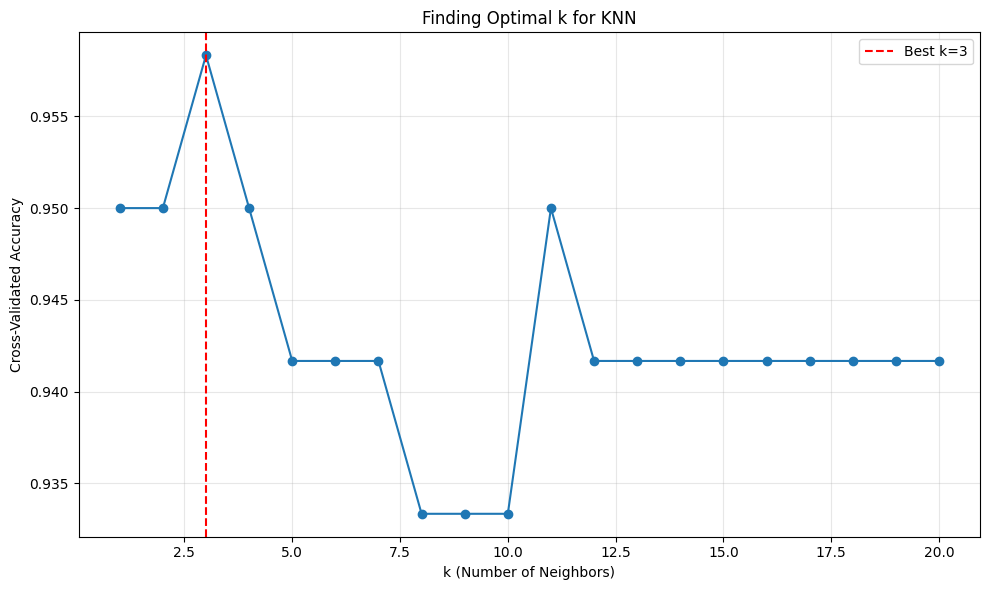

In [9]:
# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal k for KNN')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()